# Boosted decision tree tutorial

***
## Introduction:
#### Boosted decision tree code:
We'll use the python API for the [XGBoost (eXtreme Gradient Boosting) library](https://github.com/dmlc/xgboost).

#### Data handling:
If you don't have [pandas](http://pandas.pydata.org/), you should get pandas. It's an amazing tool for exploring data in Python.
***
#### Install XGBoost:
Assuming you have python, numpy, matplotlib, and pandas installed, you just need to install XGBoost. Detailed installation instructions are [here](https://xgboost.readthedocs.io/en/latest/build.html). If you're on Ubuntu, just do this (in your terminal):
```bash
git clone --recursive https://github.com/dmlc/xgboost
cd xgboost
make
```
***
#### Links:
A lot of this was borrowed from other sources. These sources and other good places for information about XGBoost and BDTs in general are here:

XGBoost demo: [Example of how to use XGBoost Python Module to run Kaggle Higgs competition](https://github.com/dmlc/xgboost/tree/master/demo/kaggle-higgs)

Blog post by phunther: [Winning solution of Kaggle Higgs competition: what a single model can do?](https://no2147483647.wordpress.com/2014/09/17/winning-solution-of-kaggle-higgs-competition-what-a-single-model-can-do/)

XGBoost Kaggle Higgs solution: https://github.com/hetong007/higgsml

***

## Tutorial:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import awkward as ak
import pickle
from sklearn.preprocessing import quantile_transform, QuantileTransformer
import uproot
import glob
import os
#!source ~/scripts/renew_cms.sh
from yahist import Hist1D
import processor.BDT_analysis as BDT_analysis
from coffea import processor, hist

import Tools.objects

import postProcessing.makeCards
import postProcessing.datacard_comparison.compare_datacards as compare_datacards

#### Load data:

In [2]:
files_all_categories = ["signal_tch.root", "signal_tuh.root", "fakes_mc.root", "flips_mc.root", "rares.root"]
dd_files = ["signal_tch.root", "signal_tuh.root", "data_fakes.root", "data_flips.root", "rares.root"]
HCT_cat = ["signal_tch.root", "fakes_mc.root", "flips_mc.root", "rares.root"]
HUT_cat = ["signal_tuh.root", "fakes_mc.root", "flips_mc.root", "rares.root"]
HCT_cat_dd = ["signal_tch.root", "data_fakes.root", "data_flips.root", "rares.root"]
HUT_cat_dd = ["signal_tuh.root", "data_fakes.root", "data_flips.root", "rares.root"]

all_files              = (["2016/MC/" + f for f in files_all_categories] + ["2017/MC/" + f for f in files_all_categories] + ["2018/MC/" + f for f in files_all_categories])
HCT_files              = (["2016/MC/" + f for f in HCT_cat] + ["2017/MC/" + f for f in HCT_cat] + ["2018/MC/" + f for f in HCT_cat])
HUT_files              = (["2016/MC/" + f for f in HUT_cat] + ["2017/MC/" + f for f in HUT_cat] + ["2018/MC/" + f for f in HUT_cat])

all_files_dd           = (["2016/data_driven/" + f for f in dd_files] + ["2017/data_driven/" + f for f in dd_files] + ["2018/data_driven/" + f for f in dd_files])
HCT_files_dd           = (["2016/data_driven/" + f for f in HCT_cat_dd] + ["2017/data_driven/" + f for f in HCT_cat_dd] + ["2018/data_driven/" + f for f in HCT_cat_dd])
HUT_files_dd           = (["2016/data_driven/" + f for f in HUT_cat_dd] + ["2017/data_driven/" + f for f in HUT_cat_dd] + ["2018/data_driven/" + f for f in HUT_cat_dd])

input_baby_dir   = "/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/"
base_output_dir  = "/home/users/cmcmahon/public_html/BDT"

all_categories   = BDT_analysis.BDT(input_baby_dir, all_files, base_output_dir, label="all_categories", year="all")
HCT              = BDT_analysis.BDT(input_baby_dir, HCT_files, base_output_dir, label="HCT", year="all")
HUT              = BDT_analysis.BDT(input_baby_dir, HUT_files, base_output_dir, label="HUT", year="all")

every_BDT = [all_categories, HCT, HUT]

In [3]:
for bdt in every_BDT:
    bdt.gen_BDT_and_plot(load_BDT=True, optimize=False, retrain=True)
    
retrain_BDTs = []#[HCT_dilep, HCT_flips, HCT_trilep_fakes, HCT_trilep_flips, HUT_dilep, HUT_trilep, HUT_trilep_fakes, HUT_trilep_flips, trilep_fakes]
for bdt in retrain_BDTs:
    bdt.gen_BDT_and_plot(load_BDT=False, optimize=True, retrain=True)

{'subsample': 0.9, 'reg_lambda': 5.0, 'n_estimators': 100, 'min_child_weight': 10.0, 'max_depth': 4, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.5}
/home/users/cmcmahon/public_html/BDT/all_categories/random_search_optimized_all/
Training new model...
[0]	eval-error:0.294774	eval-logloss:0.553703	eval-rmse:0.434091
{'subsample': 0.7, 'reg_lambda': 0.1, 'n_estimators': 60, 'min_child_weight': 7.0, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6}
/home/users/cmcmahon/public_html/BDT/HCT/random_search_optimized_all/
Training new model...
[0]	eval-error:0.290703	eval-logloss:0.551413	eval-rmse:0.432730
{'subsample': 0.8, 'reg_lambda': 0.1, 'n_estimators': 60, 'min_child_weight': 5.0, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7}
/home/users/cmcmahon/public_html/BDT/HUT/random_search_optimized_all/
Training new model...
[0]	eval-error:0.291416	eva

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [28]:
flag_gen_datacards = True
if flag_gen_datacards:
    for y in [2016, 2017, 2018]:
        data_dir = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/{}/data_driven/".format(y)]
        for bdt in every_BDT:
            bdt.gen_datacards(data_dir, y, quantile_transform=True, data_driven=True)

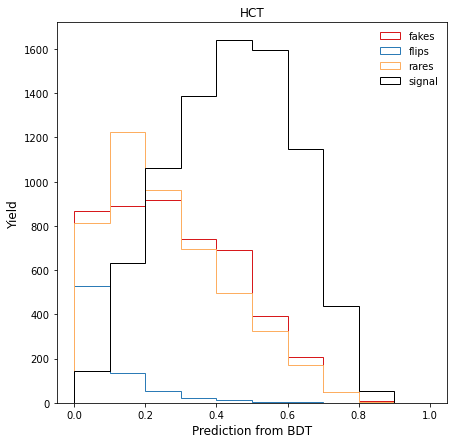

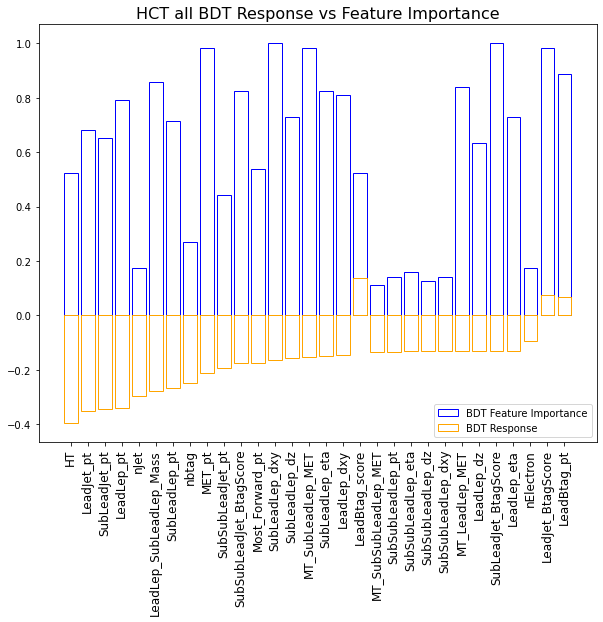

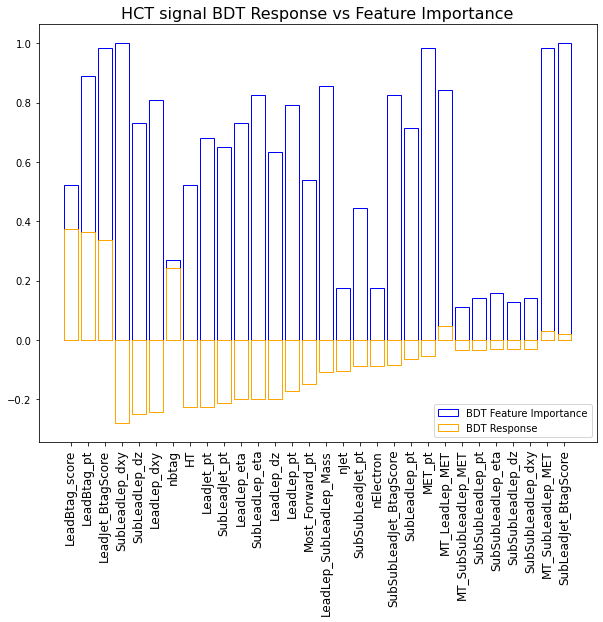

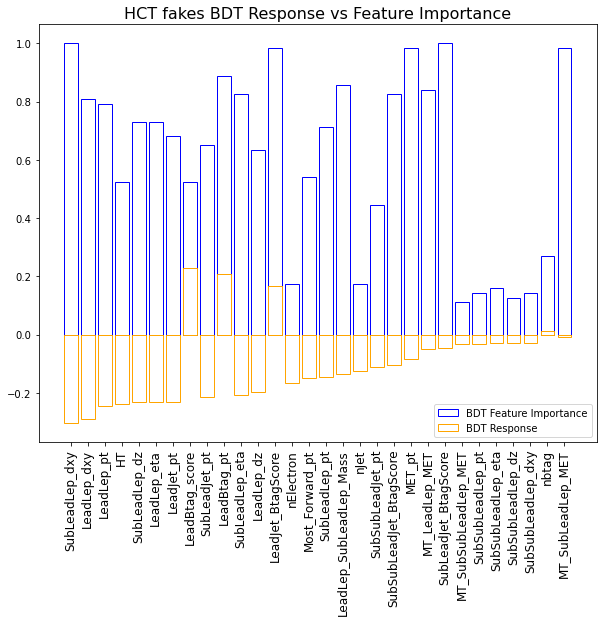

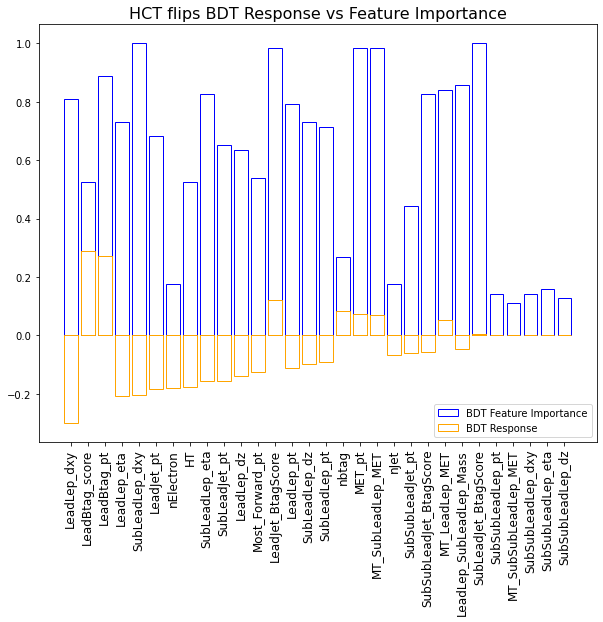

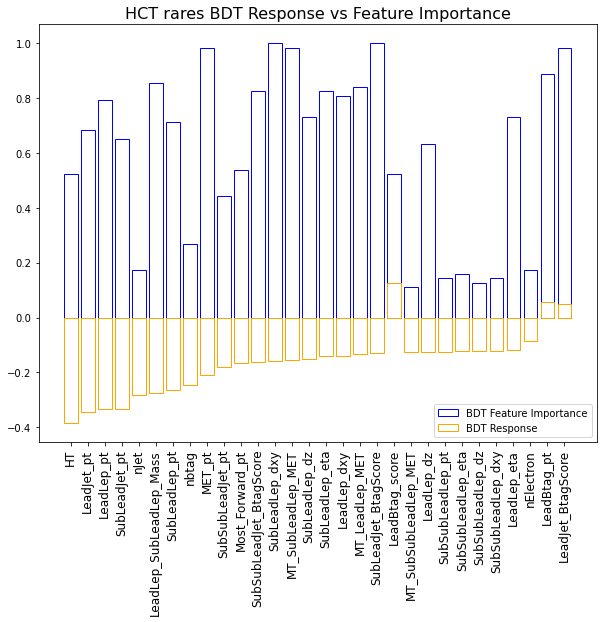

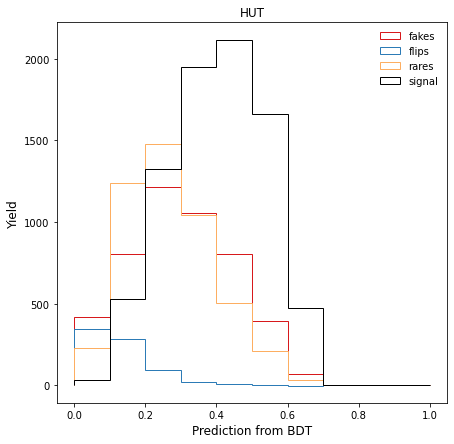

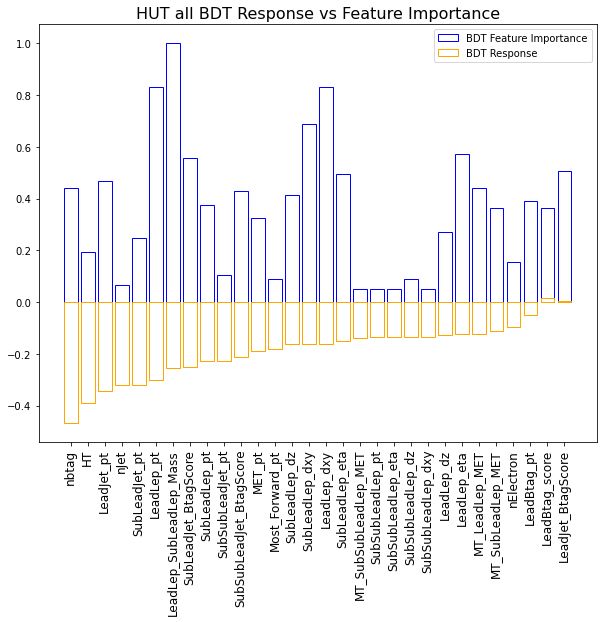

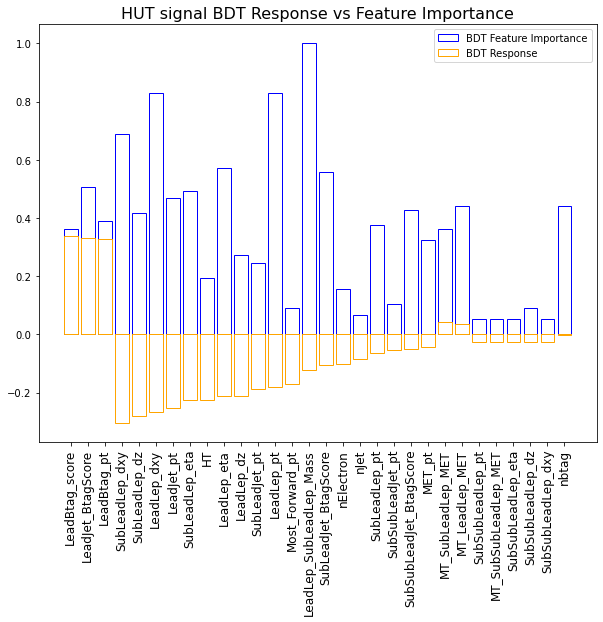

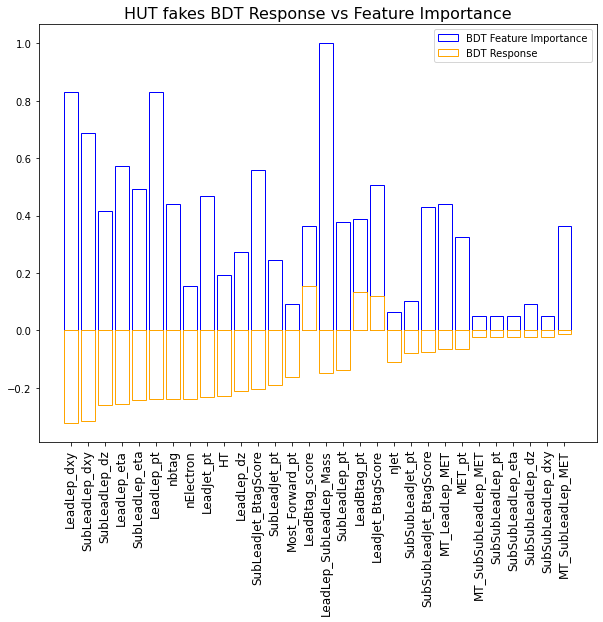

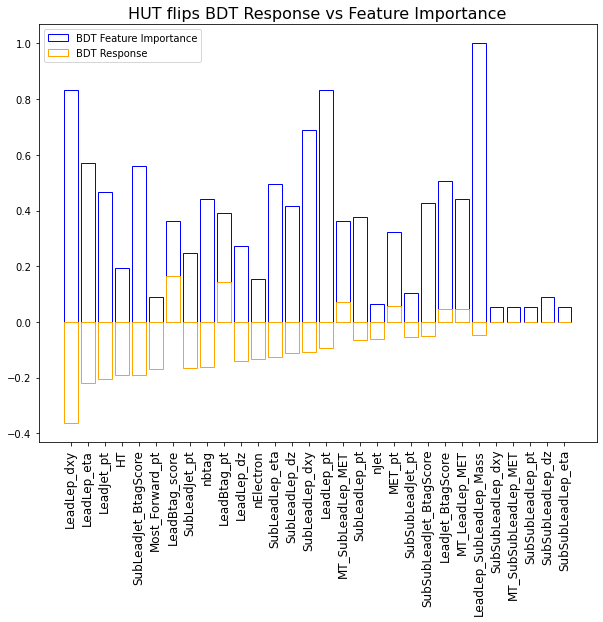

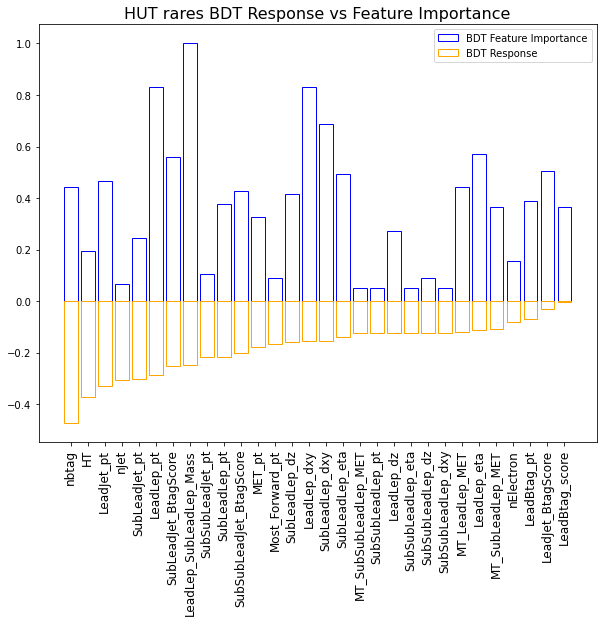

In [4]:
all_directories = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies" + f for f in ["/2016/MC/", "/2017/MC/", "/2018/MC/"]]
all_directories_data_driven = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies" + f for f in ["/2016/data_driven/", "/2017/data_driven/", "/2018/data_driven/"]]
#run this later, compare data driven vs mc
for bdt in [HCT, HUT]:#, all_categories]:
#HCT.fill_dicts(all_directories_data_driven, data_driven=True)
    bdt.fill_dicts(all_directories, data_driven=False)
    bdt.plot_categories(plot=True, savefig=True)
    for l in ["all", "signal", "fakes", "flips", "rares"]:
        bdt.plot_response(plot=True, savefig=True, label=l)

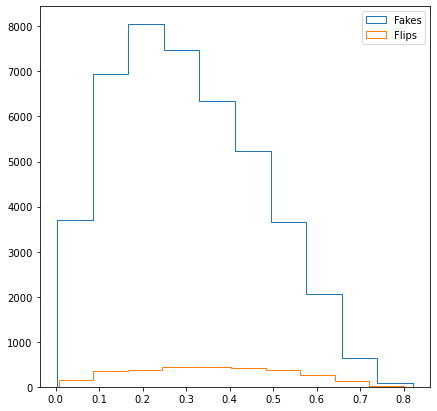

In [41]:
plt.figure("test", figsize=(7,7))
plt.hist(test_cd["fakes"]["prediction"], label = "Fakes", histtype='step')
plt.hist(test_cd["flips"]["prediction"], label = "Flips", histtype='step')
plt.legend()
plt.draw()
# HCT.fill_dicts(all_directories, data_driven=False)
# HCT.plot_categories(plot=True, savefig=False)

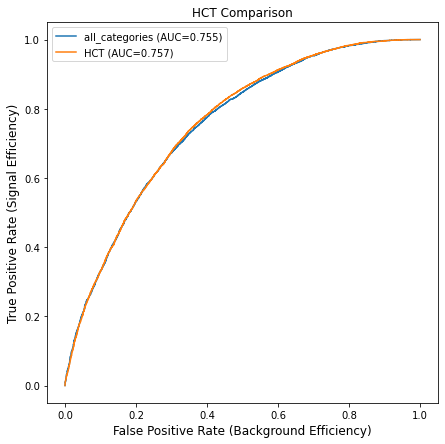

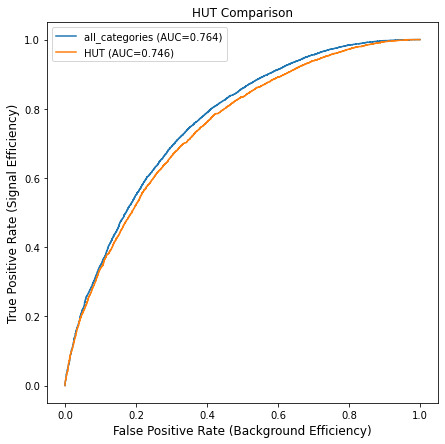

In [5]:
all_directories = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies" + f for f in ["/2016/MC/", "/2017/MC/", "/2018/MC/"]]
misc_dir = "/home/users/cmcmahon/public_html/BDT/etc/"

comparison_BDTs = [all_categories, HCT]
for bdt in comparison_BDTs:
    bdt.fill_dicts(all_directories)
first_bdt = comparison_BDTs.pop(0)
first_bdt.make_roc(signal="HCT", other_boosters=comparison_BDTs, title="HCT Comparison")
plt.savefig(misc_dir + "HCT_all_ROC.pdf")

comparison_BDTs = [all_categories, HUT]
for bdt in comparison_BDTs:
    bdt.fill_dicts(all_directories)
first_bdt = comparison_BDTs.pop(0)
first_bdt.make_roc(signal="HUT", other_boosters=comparison_BDTs, title="HUT Comparison")
plt.savefig(misc_dir + "HUT_all_ROC.pdf")

flips yield: 1150.3052978515625


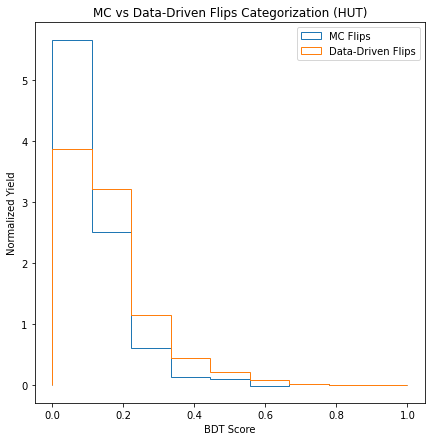

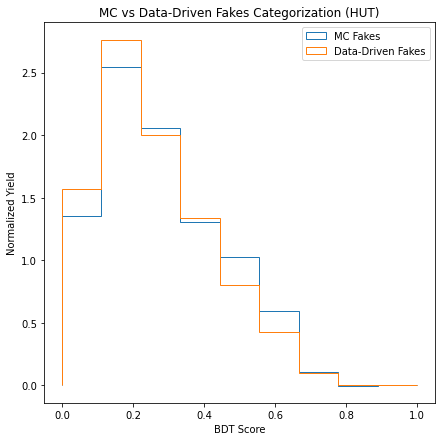

In [53]:
all_directories = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies" + f for f in ["/2016/MC/", "/2017/MC/", "/2018/MC/"]]
all_directories_data_driven = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies" + f for f in ["/2016/data_driven/", "/2017/data_driven/", "/2018/data_driven/"]]
#run this later, compare data driven vs mc
HUT.fill_dicts(all_directories_data_driven, data_driven=True)
dd_dict = HUT.category_dict.copy()
dd_hct_flips_pred = dd_dict["flips"]["prediction"]
dd_hct_flips_weight = dd_dict["flips"]["data"].weight
dd_hct_fakes_pred = dd_dict["fakes"]["prediction"]
dd_hct_fakes_weight = dd_dict["fakes"]["data"].weight

print("flips yield: {}".format(np.sum(dd_hct_flips_weight)))
HUT.fill_dicts(all_directories)
mc_dict = HUT.category_dict.copy()
mc_hct_flips_pred = mc_dict["flips"]["prediction"]
mc_hct_flips_weight = mc_dict["flips"]["data"].weight
mc_hct_fakes_pred = mc_dict["fakes"]["prediction"]
mc_hct_fakes_weight = mc_dict["fakes"]["data"].weight

plt.figure("HCT dd vs mc flips", figsize=(7,7))
test_bins = np.linspace(0, 1., 10)

plt.hist(mc_hct_flips_pred, bins=test_bins, histtype='step', label='MC Flips', weights=mc_hct_flips_weight, density=True)
plt.hist(dd_hct_flips_pred, bins=test_bins, histtype='step', label='Data-Driven Flips', weights=dd_hct_flips_weight, density=True)
plt.legend()
plt.title("MC vs Data-Driven Flips Categorization (HUT)")
plt.xlabel("BDT Score")
plt.ylabel("Normalized Yield")
plt.draw()
plt.savefig("/home/users/cmcmahon/FCNC/AN-19-201/Strategy/Inputs/HUT_MC_DD_Flips.pdf")

plt.figure("HCT dd vs mc fakes", figsize=(7,7))
plt.hist(mc_hct_fakes_pred, bins=test_bins, histtype='step', label='MC Fakes', weights=mc_hct_fakes_weight, density=True)
plt.hist(dd_hct_fakes_pred, bins=test_bins, histtype='step', label='Data-Driven Fakes', weights=dd_hct_fakes_weight, density=True)
plt.legend()
plt.title("MC vs Data-Driven Fakes Categorization (HUT)")
plt.xlabel("BDT Score")
plt.ylabel("Normalized Yield")
plt.draw()
plt.savefig("/home/users/cmcmahon/FCNC/AN-19-201/Strategy/Inputs/HUT_MC_DD_Fakes.pdf")

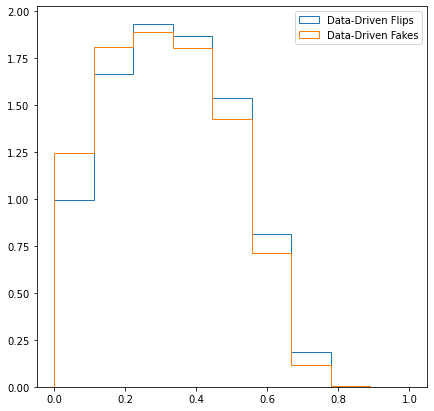

In [33]:
plt.figure("test", figsize=(7,7))
plt.hist(dd_hct_flips_pred, bins=test_bins, histtype='step', label='Data-Driven Flips', weights=dd_hct_flips_weight, density=True)
plt.hist(dd_hct_fakes_pred, bins=test_bins, histtype='step', label='Data-Driven Fakes', weights=dd_hct_fakes_weight, density=True)
plt.legend()
plt.draw()

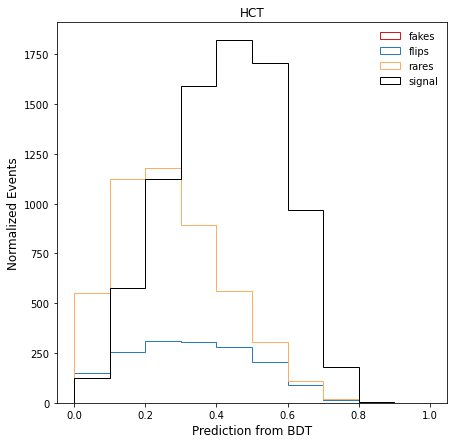

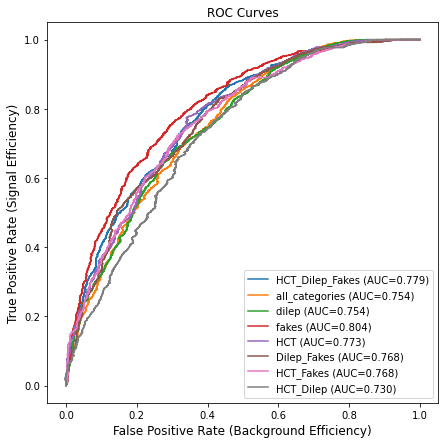

In [19]:
all_directories = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/all_years" + f for f in ["/dilep/", "/trilep/"]]
dilep_directories = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/all_years/dilep/"]
trilep_directories = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/all_years/trilep/"]
comparison_HCT_dilep_fakes_BDTs = [HCT_dilep_fakes, all_categories, dilep, fakes, HCT, dilep_fakes, HCT_fakes, HCT_dilep]
for bdt in comparison_HCT_dilep_fakes_BDTs:
    bdt.fill_dicts(dilep_directories, background="fakes")
first_bdt = comparison_HCT_dilep_fakes_BDTs.pop(0)
first_bdt.make_roc(signal="HCT", other_boosters=comparison_HCT_dilep_fakes_BDTs)

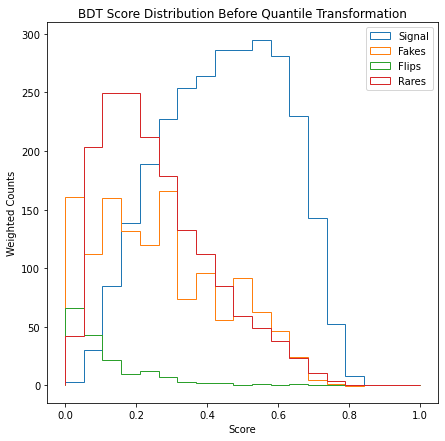

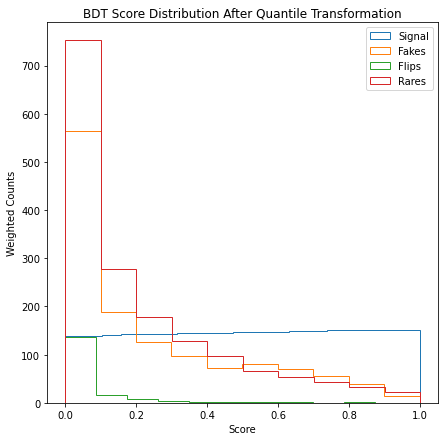

In [19]:
HCT.fill_dicts(all_directories)
hct_flips_pred = HCT.category_dict["flips"]["prediction"]
hct_rares_pred = HCT.category_dict["rares"]["prediction"]
test_bins = np.linspace(0, 1., 20)
plt.figure("before_QT", figsize=(7,7))
plt.hist(hct_sig_pred, bins=test_bins, histtype='step', label='Signal', weights=HCT.category_dict["signal"]["data"].weight/100)
plt.hist(hct_back_pred, bins=test_bins, histtype='step', label='Fakes', weights=HCT.category_dict["fakes"]["data"].weight)
plt.hist(hct_flips_pred, bins=test_bins, histtype='step', label='Flips', weights=HCT.category_dict["flips"]["data"].weight)
plt.hist(hct_rares_pred, bins=test_bins, histtype='step', label='Rares', weights=HCT.category_dict["rares"]["data"].weight)
plt.xlabel("Score")
plt.ylabel("Weighted Counts")
plt.title("BDT Score Distribution Before Quantile Transformation")
plt.legend()
plt.savefig(misc_dir + "QT_before.pdf")
plt.draw()
qt = QuantileTransformer(output_distribution="uniform")
qt.fit(hct_sig_pred.reshape(-1, 1))
xf_sig_pred = qt.transform(hct_sig_pred.reshape(-1, 1)).flatten()
xf_back_pred = qt.transform(hct_back_pred.reshape(-1, 1)).flatten()
xf_flips_pred = qt.transform(hct_flips_pred.reshape(-1, 1)).flatten()
xf_rares_pred = qt.transform(hct_rares_pred.reshape(-1, 1)).flatten()
#test2 = quantile_transform(hct_sig_pred.reshape(-1, 1), output_distribution="uniform")[:,0] #single feature
#quantile_transform(test1.to_frame(), n_quantiles=900, output_distribution='normal', copy=True).squeeze()
# print(test2[:,0])
plt.figure("after_QT", figsize=(7,7))
plt.hist(xf_sig_pred, histtype='step', bins=test_bins, label='Signal', weights=HCT.category_dict["signal"]["data"].weight/100)
plt.hist(xf_back_pred, histtype='step', label='Fakes', weights=HCT.category_dict["fakes"]["data"].weight)
plt.hist(xf_flips_pred, histtype='step', label='Flips', weights=HCT.category_dict["flips"]["data"].weight)
plt.hist(xf_rares_pred, histtype='step', label='Rares', weights=HCT.category_dict["rares"]["data"].weight)

plt.xlabel("Score")
plt.ylabel("Weighted Counts")
plt.title("BDT Score Distribution After Quantile Transformation")
#plt.xlim(0, 1.1)
plt.legend()
plt.savefig(misc_dir + "QT_after.pdf")
plt.draw()

[07:41:50] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:41:51] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:41:51] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:41:52] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:41:53] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:41:53] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:41:54] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:41:55] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:41:56] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:41:57] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:41:58] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:41:59] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:42:00] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:42:01] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[07:42

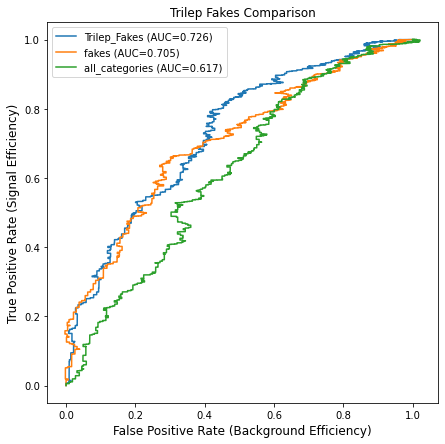

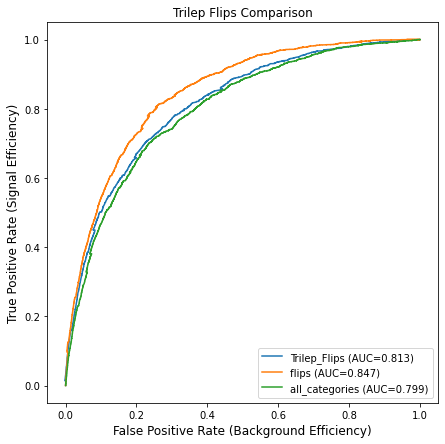

In [20]:
trilep_directories = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/all_years/trilep/"]
comparison_trilep_fakes_BDTs = [trilep_fakes, fakes, all_categories]
for bdt in comparison_trilep_fakes_BDTs:
    bdt.fill_dicts(trilep_directories, background="fakes")
first_bdt = comparison_trilep_fakes_BDTs.pop(0)
first_bdt.make_roc(other_boosters=comparison_trilep_fakes_BDTs, title="Trilep Fakes Comparison")

comparison_trilep_flips_BDTs = [trilep_flips, flips_rares, all_categories]
for bdt in comparison_trilep_flips_BDTs:
    bdt.fill_dicts(trilep_directories, background="flips")
first_bdt = comparison_trilep_flips_BDTs.pop(0)
first_bdt.make_roc(other_boosters=comparison_trilep_flips_BDTs, title="Trilep Flips Comparison")

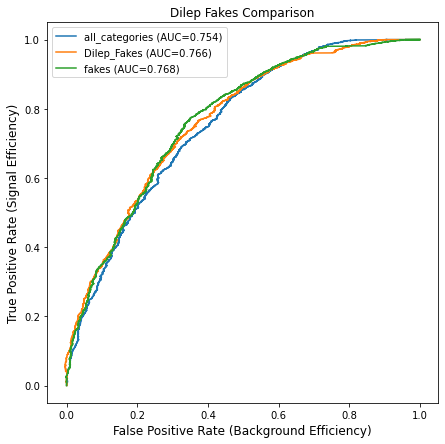

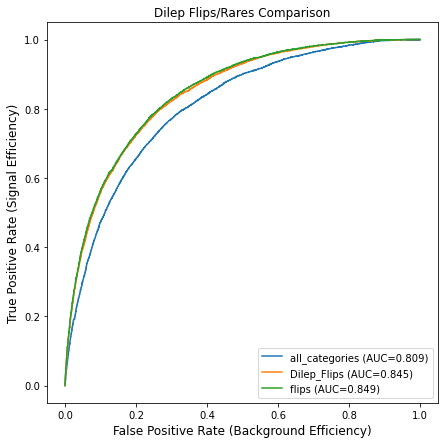

In [11]:
comparison_BDTs = [all_categories, dilep_fakes, fakes]
for bdt in comparison_BDTs:
    bdt.fill_dicts(dilep_directories, background="fakes")
first_bdt = comparison_BDTs.pop(0)
first_bdt.make_roc(other_boosters=comparison_BDTs, title="Dilep Fakes Comparison")

comparison_BDTs = [all_categories, dilep_flips, flips_rares]
for bdt in comparison_BDTs:
    bdt.fill_dicts(dilep_directories, background="flips")
first_bdt = comparison_BDTs.pop(0)
first_bdt.make_roc(other_boosters=comparison_BDTs, title="Dilep Flips/Rares Comparison")

[11:59:38] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:39] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:40] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:41] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:42] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:43] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:44] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:45] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:46] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:47] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:48] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:49] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:50] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59:51] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[11:59

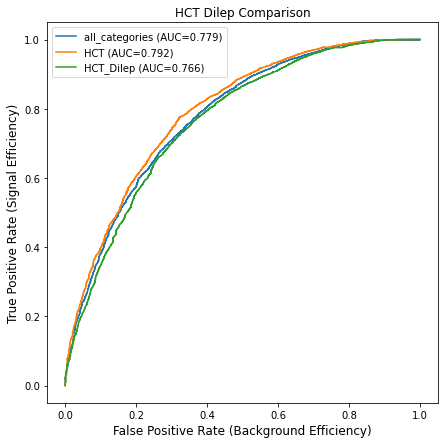

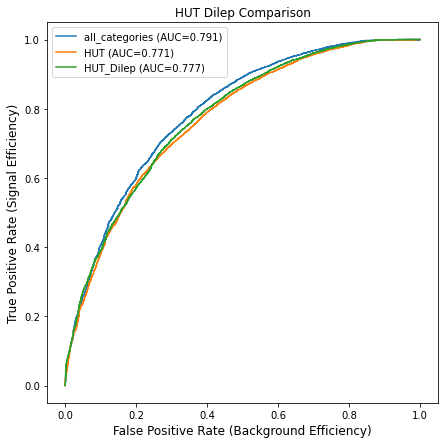

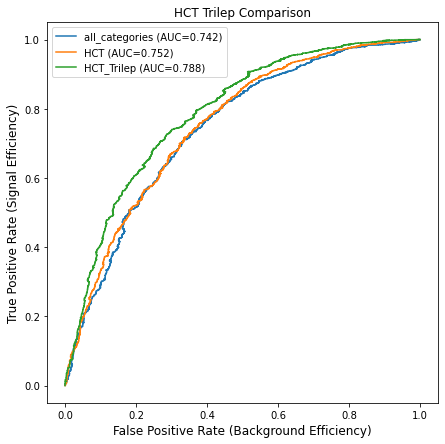

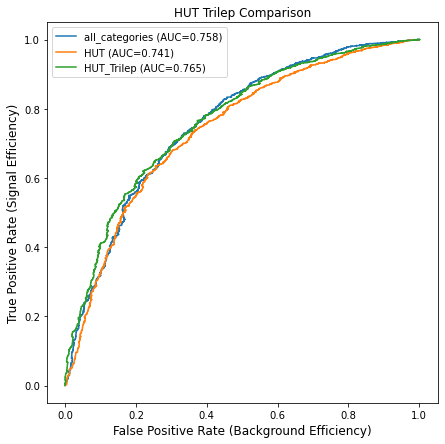

In [14]:
comparison_BDTs = [all_categories, HCT, HCT_dilep]
for bdt in comparison_BDTs:
    bdt.fill_dicts(dilep_directories)
first_bdt = comparison_BDTs.pop(0)
first_bdt.make_roc(signal="HCT", other_boosters=comparison_BDTs, title="HCT Dilep Comparison")

comparison_BDTs = [all_categories, HUT, HUT_dilep]
for bdt in comparison_BDTs:
    bdt.fill_dicts(dilep_directories)
first_bdt = comparison_BDTs.pop(0)
first_bdt.make_roc(signal="HUT", other_boosters=comparison_BDTs, title="HUT Dilep Comparison")

comparison_BDTs = [all_categories, HCT, HCT_trilep]
for bdt in comparison_BDTs:
    bdt.fill_dicts(trilep_directories)
first_bdt = comparison_BDTs.pop(0)
first_bdt.make_roc(signal="HCT", other_boosters=comparison_BDTs, title="HCT Trilep Comparison")

comparison_BDTs = [all_categories, HUT, HUT_trilep]
for bdt in comparison_BDTs:
    bdt.fill_dicts(trilep_directories)
first_bdt = comparison_BDTs.pop(0)
first_bdt.make_roc(signal="HUT", other_boosters=comparison_BDTs, title="HUT Trilep Comparison")

{'subsample': 0.9, 'reg_lambda': 10.0, 'n_estimators': 150, 'min_child_weight': 3.0, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1.0, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5}
/home/users/cmcmahon/public_html/BDT/all_categories/random_search_optimized_all/
Loading saved model...
{'subsample': 1.0, 'reg_lambda': 1.0, 'n_estimators': 200, 'min_child_weight': 5.0, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.9, 'colsample_bylevel': 1.0}
/home/users/cmcmahon/public_html/BDT/fakes/random_search_optimized_all/
Loading saved model...
{'subsample': 0.8, 'reg_lambda': 5.0, 'n_estimators': 200, 'min_child_weight': 1.0, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.25, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.9}
/home/users/cmcmahon/public_html/BDT/flips/random_search_optimized_all/
Loading saved model...
{'subsample': 0.9, 'reg_lambda': 5.0, 'n_estimators': 60, 'min_child_weight': 5.0, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.25, 'colsa

NameError: name 'flips' is not defined

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

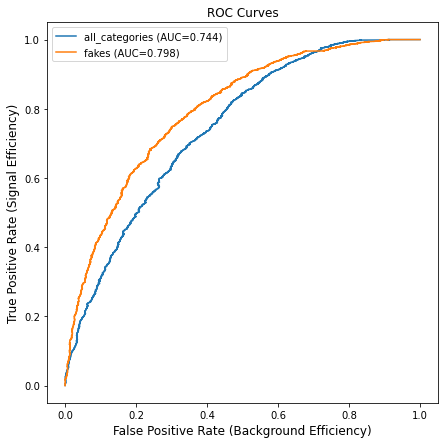

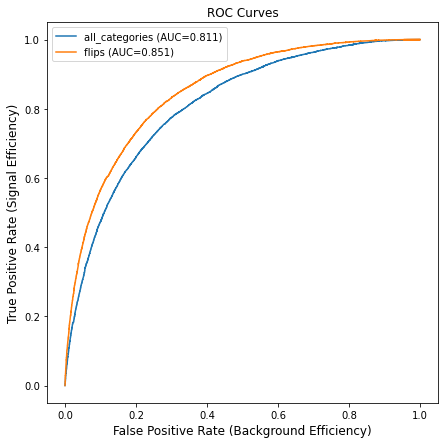

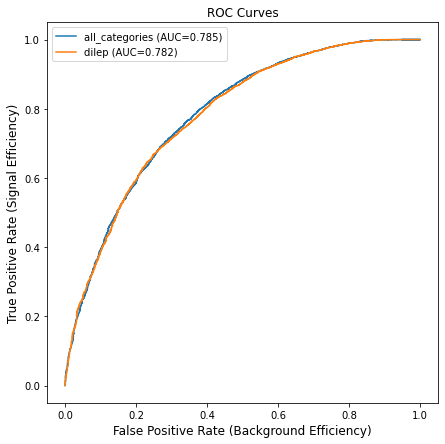

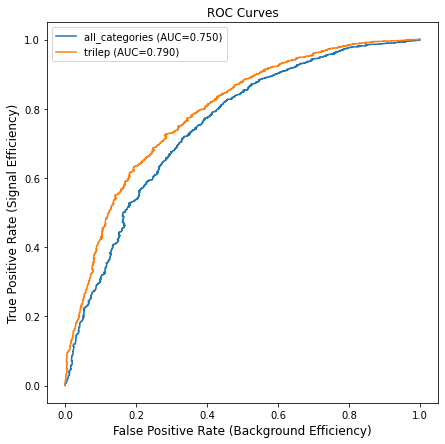

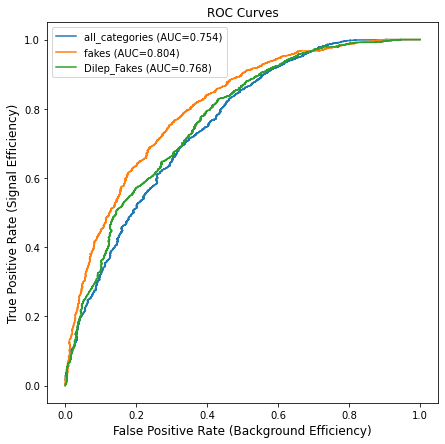

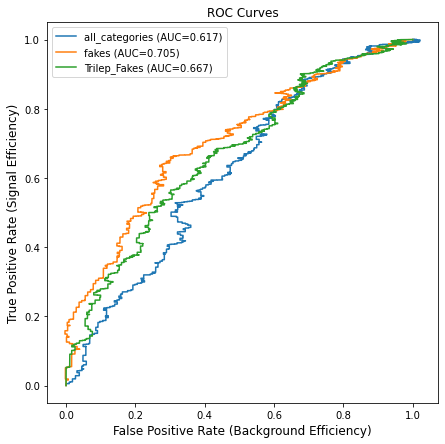

In [22]:
all_categories.gen_BDT_and_plot(load=True, make_plots=False)
fakes.gen_BDT_and_plot(load=True, make_plots=False)
flips_rares.gen_BDT_and_plot(load=True, make_plots=False)
dilep.gen_BDT_and_plot(load=True, make_plots=False)
trilep.gen_BDT_and_plot(load=True, make_plots=False)
dilep_fakes.gen_BDT_and_plot(load=True, make_plots=False)
dilep_flips.gen_BDT_and_plot(load=True, make_plots=False)
trilep_fakes.gen_BDT_and_plot(load=True, make_plots=False)
trilep_flips.gen_BDT_and_plot(load=True, make_plots=False)


all_categories.fill_dicts(all_directories, background="fakes")
fakes.fill_dicts(all_directories, background="fakes")
all_categories.make_roc([fakes])

all_categories.fill_dicts(all_directories, background="flips")
flips_rares.fill_dicts(all_directories, background="flips")
all_categories.make_roc([flips_rares])

all_categories.fill_dicts(dilep_directories)
dilep.fill_dicts(dilep_directories)
all_categories.make_roc([dilep])

all_categories.fill_dicts(trilep_directories)
trilep.fill_dicts(trilep_directories)
all_categories.make_roc([trilep])

all_categories.fill_dicts(dilep_directories, background="fakes")
fakes.fill_dicts(dilep_directories, background="fakes")
dilep_fakes.fill_dicts(dilep_directories, background="fakes")
all_categories.make_roc([fakes, dilep_fakes])

all_categories.fill_dicts(trilep_directories, background="fakes")
fakes.fill_dicts(trilep_directories, background="fakes")
trilep_fakes.fill_dicts(trilep_directories, background="fakes")
all_categories.make_roc([fakes, trilep_fakes])

all_categories.fill_dicts(dilep_directories, background="flips")
flips.fill_dicts(dilep_directories, background="flips")
dilep_flips.fill_dicts(dilep_directories, background="flips")
all_categories.make_roc([flips, dilep_flips])

all_categories.fill_dicts(trilep_directories, background="flips")
flips.fill_dicts(trilep_directories, background="flips")
trilep_flips.fill_dicts(trilep_directories, background="flips")
all_categories.make_roc([flips, trilep_flips])

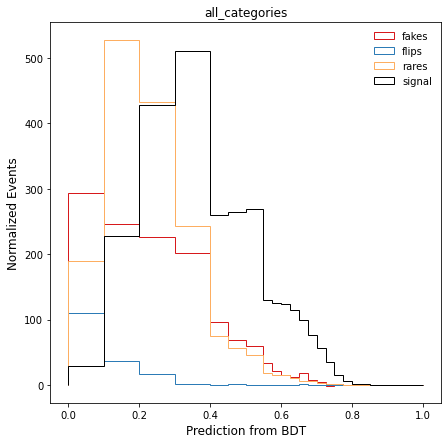

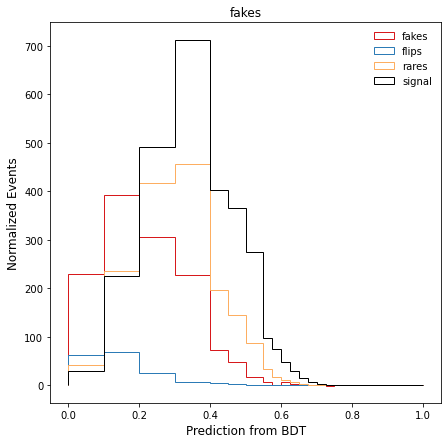

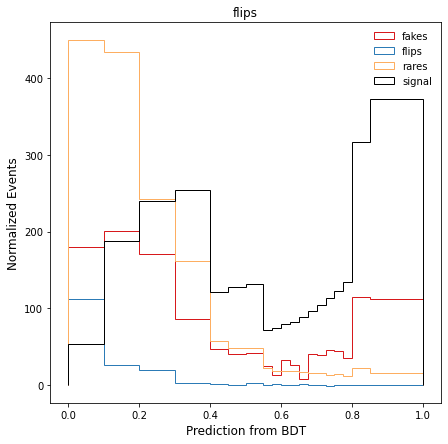

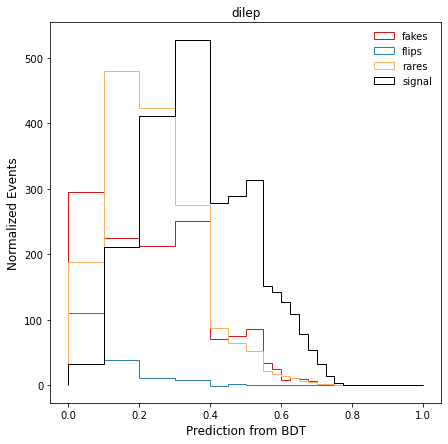

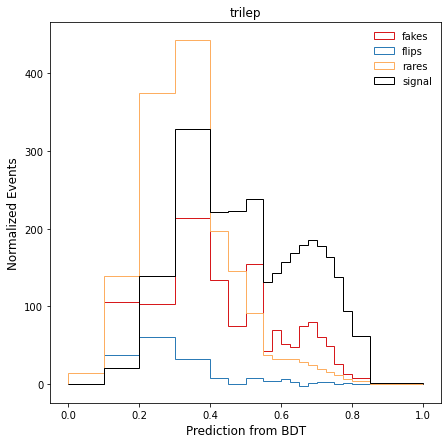

In [12]:
all_categories.fill_dicts(all_directories)
fakes.fill_dicts(all_directories)
flips_rares.fill_dicts(all_directories)
dilep.fill_dicts(all_directories)
trilep.fill_dicts(all_directories)

all_categories.plot_categories()
fakes.plot_categories()
flips_rares.plot_categories()
dilep.plot_categories()
trilep.plot_categories()

In [20]:
all_categories.fill_dicts(all_directories)
fakes.fill_dicts(all_directories)
flips_rares.fill_dicts(all_directories)
dilep.fill_dicts(dilep_directories)
trilep.fill_dicts(trilep_directories)

all_categories.gen_datacards()
fakes.gen_datacards()
flips_rares.gen_datacards()
dilep.gen_datacards()
trilep.gen_datacards()

[13:10:21] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[13:10:22] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0
[13:10:23] WARNING: ../src/learner.cc:1238: Empty dataset at worker: 0


In [9]:
print(fakes.evals_result["train"].keys())

odict_keys(['error', 'logloss', 'rmse'])


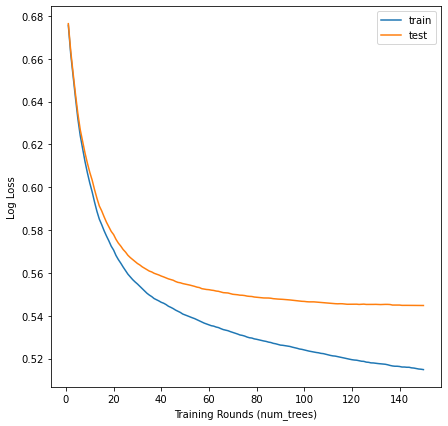

In [9]:
dir(all_categories.booster)
evals = all_categories.evals_result
plt.figure("loss", figsize=(7,7))
train_errors = evals["train"]["logloss"]
test_errors = evals["test"]["logloss"]
iterations = np.arange(1, len(test_errors)+1)
plt.plot(iterations, train_errors, label="train")
plt.plot(iterations, test_errors, label="test")
plt.legend()
plt.xlabel("Training Rounds (num_trees)")
plt.ylabel("Log Loss")
plt.draw()

TypeError: draw_wrapper() missing 1 required positional argument: 'renderer'

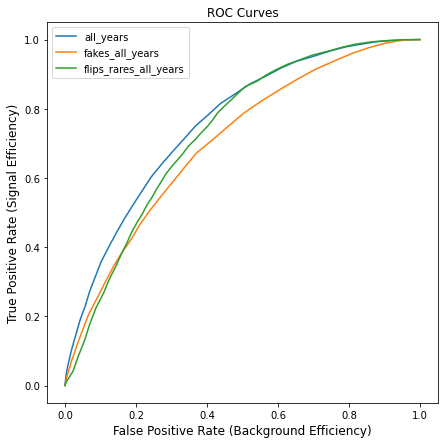

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [81]:
all_years.make_roc([fakes_all_years, flips_rares_all_years])

{'subsample': 1.0, 'reg_lambda': 0.1, 'n_estimators': 50, 'min_child_weight': 3.0, 'max_depth': 4, 'learning_rate': 0.3, 'gamma': 0.5, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.8}
{'subsample': 1.0, 'reg_lambda': 0.1, 'n_estimators': 20, 'min_child_weight': 5.0, 'max_depth': 4, 'learning_rate': 0.7, 'gamma': 1.0, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.8}
/home/users/cmcmahon/public_html/BDT/all_years/random_search_optimized_all/
Training new model...
[0]	eval-error:0.290951	eval-logloss:0.554995	eval-rmse:0.434436


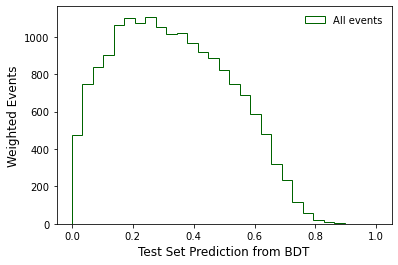

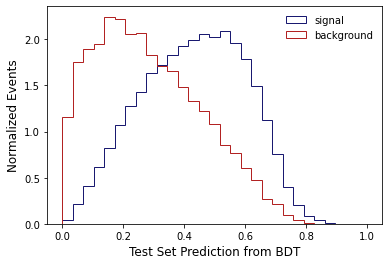

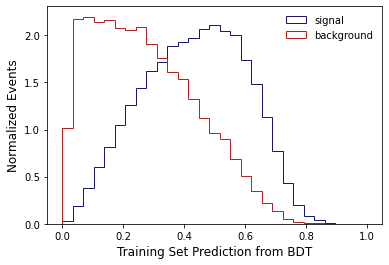

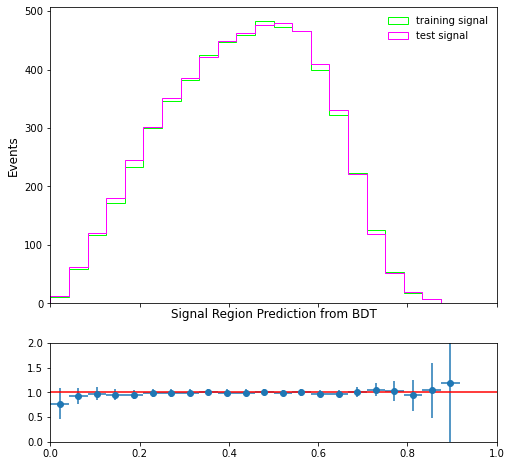

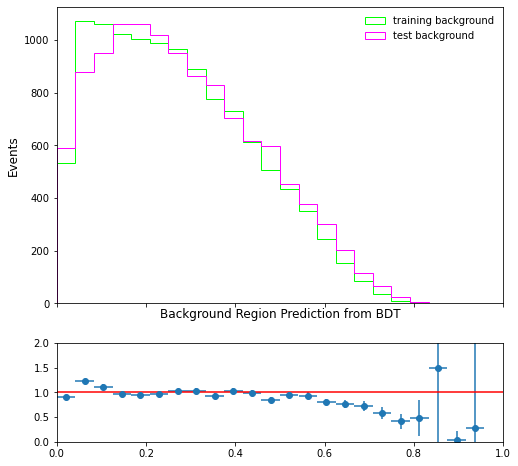

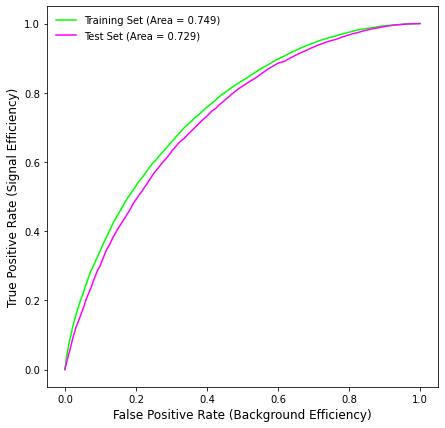

<Figure size 720x720 with 0 Axes>

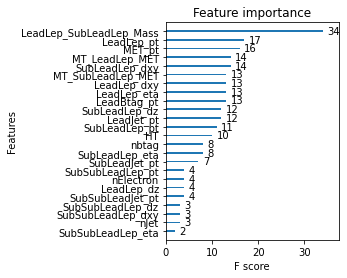

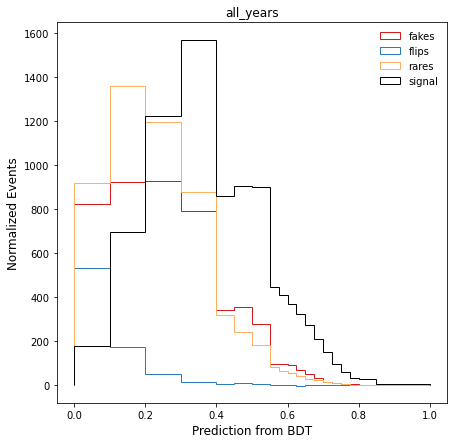

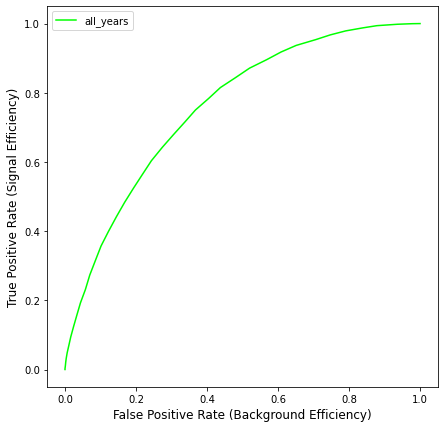

In [69]:
directories_2018 = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/2018" + f for f in ["/dilep/", "/trilep/"]]
directories_2017 = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/2017" + f for f in ["/dilep/", "/trilep/"]]
directories_2016 = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/2016" + f for f in ["/dilep/", "/trilep/"]]
all_directories = directories_2016 + directories_2017 + directories_2018
tmp_params = {
    'subsample': 1.0, 
    'reg_lambda': 0.1,
    'n_estimators': 20,
    'min_child_weight': 5.0,
    'max_depth': 4,
    'learning_rate': 0.7,
    'gamma': 1.0,
    'colsample_bytree': 1.0,
    'colsample_bylevel': 0.8}
# all_years.set_booster_label()
# all_years.load_booster_params()
# print(all_years.booster_params)
# all_years.booster_params = tmp_params
# all_years.gen_BDT(False)
# all_years.get_predictions()
# all_years.gen_prediction_plots(savefig=True, plot=True)
load_custom_params(all_years, tmp_params, all_directories)

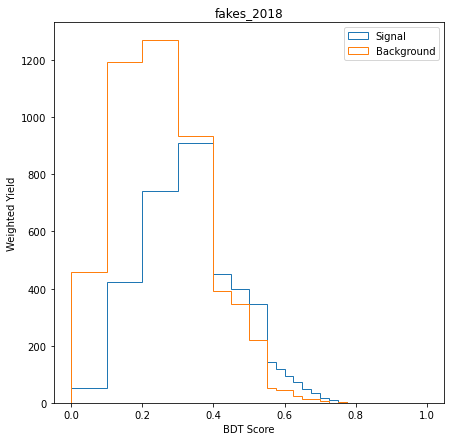

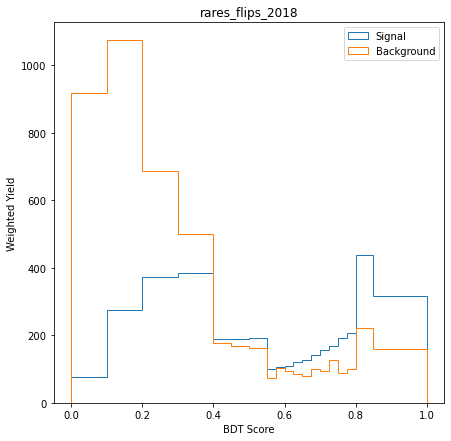

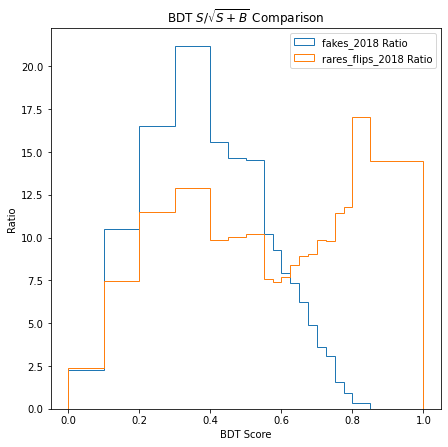

In [13]:
compare_S_B_ratio([fakes_2018, rares_flips_2018], fill_categories=False)

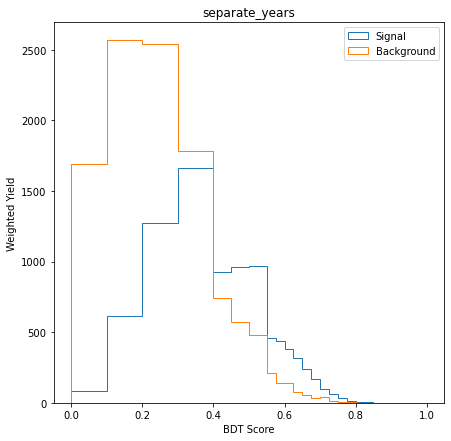

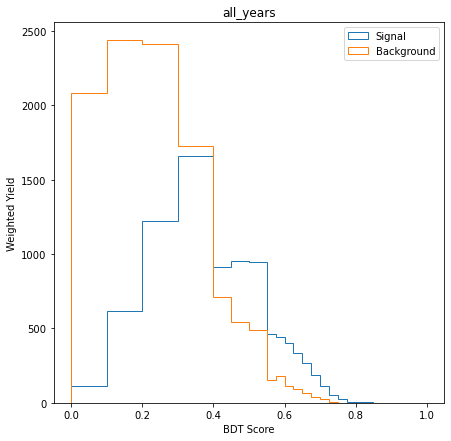

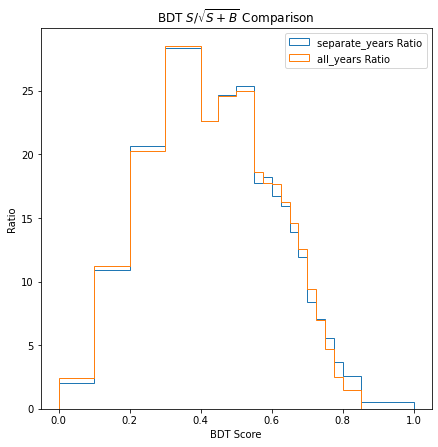

In [30]:
compare_S_B_ratio([separate_years, all_years], fill_categories=False)

{'subsample': 0.9, 'reg_lambda': 50.0, 'n_estimators': 30, 'min_child_weight': 3.0, 'max_depth': 4, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.8}
/home/users/cmcmahon/public_html/BDT/fakes_2018/random_search_optimized_2018/
Training new model...
[0]	eval-error:0.277957	eval-logloss:0.553588	eval-rmse:0.431739
{'subsample': 0.7, 'reg_lambda': 5.0, 'n_estimators': 100, 'min_child_weight': 7.0, 'max_depth': 2, 'learning_rate': 0.7, 'gamma': 0.5, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.4}
/home/users/cmcmahon/public_html/BDT/all_2018/random_search_optimized_2018/
Training new model...
[0]	eval-error:0.300728	eval-logloss:0.565235	eval-rmse:0.438931


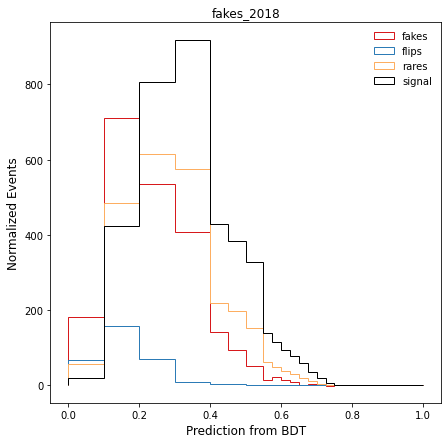

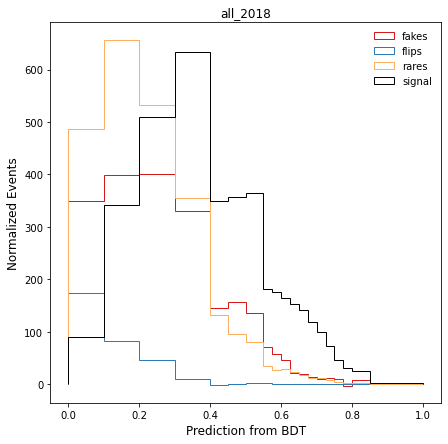

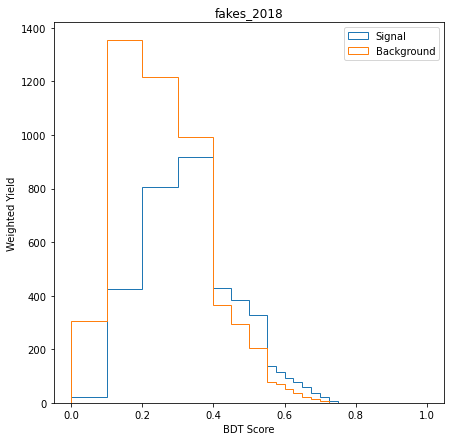

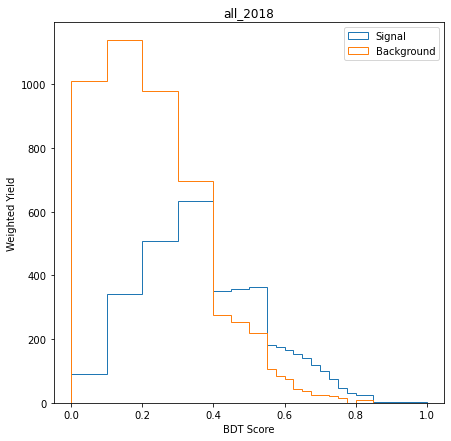

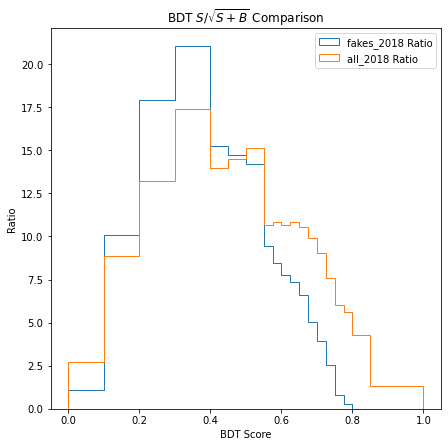

In [110]:
#fakes_2018.optimize_booster()
#all_2018.optimize_booster()
fakes_2018.load_booster_params()
all_2018.load_booster_params()
fakes_2018.set_booster_label()
all_2018.set_booster_label()
fakes_2018.gen_BDT(False)#flag_load=True
fakes_2018.get_predictions()
fakes_2018.gen_prediction_plots(savefig=True, plot=False)

all_2018.gen_BDT(False)
all_2018.get_predictions()
all_2018.gen_prediction_plots(savefig=True, plot=False)
directories_2018 = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/2018" + f for f in ["/dilep/", "/trilep/"]]
directories_2017 = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/2017" + f for f in ["/dilep/", "/trilep/"]]
directories_2016 = ["/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/babies/2016" + f for f in ["/dilep/", "/trilep/"]]
fakes_2018.make_category_dict(directories_2018)
fakes_2018.plot_categories()
all_2018.make_category_dict(directories_2018)
all_2018.plot_categories()
#make dicts for filling datacards
fakes_2018.make_category_dict(directories_2018, "HCT")
fakes_2018.gen_datacard("HCT")
fakes_2018.make_category_dict(directories_2018, "HUT")
fakes_2018.gen_datacard("HUT")
all_2018.make_category_dict(directories_2018, "HCT")
all_2018.gen_datacard("HCT")
all_2018.make_category_dict(directories_2018, "HUT")
all_2018.gen_datacard("HUT")

compare_S_B_ratio([fakes_2018, all_2018], directories_2018)

#### Format data:
Now we should get the data into an XGBoost-friendly format. We can create DMatrix objects that will be used to train the BDT model.

Check out [scikit-learn Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html) for dividing up samples in a responsible way.

We can also change the data type of the "Label" column to the pandas type "category" for easier use later.

The DMatrix object takes as arguments:
- data --- the features
- label --- 1/0 or true/false for binary data (we have to convert our label to bool from string s/b)
- missing --- how missing values are represented (here as -999.0)
- feature_names --- the names of all of the features (optional)

### Make the model
#### Set hyperparameters:
The XGBoost hyperparameters are defined [here](https://github.com/dmlc/xgboost/blob/master/doc/parameter.md). For a nice description of what they all mean, and tips on tuning them, see [this guide](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/).

In general, the tunable parameters in XGBoost are the ones you would see in other gradient boosting libraries. Here, they fall into three categories:
1. General parameters - Ex. :which booster to use, number of threads. I won't mess with any of these here.
2. Booster parameters - Tune the actual boosting. Ex.: learning rate. These are the ones to optimize.
3. Learning task parameters - Define the objective function and the evaluation metrics.

Here, we will use the defaults for most parameters and just set a few to see how it's done. The parameters are passed in as a dictionary or list of pairs.

Make the parameter dictionary:

First, we set the booster parameters. Again, we just chose a few here to experiment with. These are the paraters to tune to optimize your model. Generally, there is a trade off between speed and accuracy.
1. ```eta``` is the learning rate. It determines how much to change the data weights after each boosting iteration. The default is 0.3.
2. ```max_depth``` is the maximum depth of any tree. The default is 6.
3. ```subsample``` is the fraction of events used to train each new tree. These events are randomly sampled each iteration from the whole sample set. The default is 1 (use every event for each tree).
4. ```colsample_bytree``` is the fraction of features available to train each new tree. These features are randomly sampled each iteration from the whole feature set. The default is 1.

Next, we set the learning objective to ```binary:logistic```. So, we have two classes that we want to score from 0 to 1. The ```eval_metric``` parameters set what we want to monitor when doing cross validation. (We aren't doing cross validation in this example, but we really should be!) If you want to watch more than one metric, ```param``` must be a list of pairs, instead of a dict. Otherwise, we would just keep resetting the same parameter.

We now have a trained model. The next step is to look at it's performance and try to improve the model if we need to. We can try to improve it by improving/adding features, adding more training data, using more boosting iterations, or tuning the hyperparameters (ideally in that order).

### Plot the BDT Predictions on Test and Training Data

### Generate Feature Plots for Signal/Background

In [90]:
dict_HCT_regions = {}
dict_HUT_regions = {}
if flag_load_babies:
    dict_SR = {"HCT":dict_HCT_regions, "HUT":dict_HUT_regions}
    for s in ["HCT", "HUT"]:
        if s == "HUT":
            BDT_signal = BDT_analysis.load_category("signal_tuh")
        elif s == "HCT":
            BDT_signal = BDT_analysis.load_category("signal_tch")
        BDT_flips = BDT_analysis.load_category("flips_mc")
        BDT_fakes = BDT_analysis.load_category("fakes_mc")
        BDT_rares = BDT_analysis.load_category("rares")
        dict_SR[s]["signal"] = BDT_signal
        dict_SR[s]["fakes"] = BDT_fakes
        dict_SR[s]["flips"] = BDT_flips
        dict_SR[s]["rares"] = BDT_rares
    
else:
    dict_SR = {"HCT":dict_HCT_regions, "HUT":dict_HUT_regions}
    for s in ["HCT", "HUT"]:
        BDT_signal, BDT_fakes = get_SR_BR(s, base_dir, version, year, BDT_params, background_category="fakes", flag_match_yields=False)[:2]
        BDT_flips = get_SR_BR(s, base_dir, version, year, BDT_params, background_category="flips", flag_match_yields=False, gen_signal=False)[1]
        BDT_rares = get_SR_BR(s, base_dir, version, year, BDT_params, background_category="rares", flag_match_yields=False, gen_signal=False)[1]


### Generate Datacards for Comparison
To do this, we need to make a full dataset (no more splitting into train/test).

### Compare Background Categories
Fakes, flips, rares, and signal. We also will scale the total yields of each category to match the total yields in Kaitlin's datacards.

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__pow__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_check_consistency', '_counts', '_edges', '_empty', '_errors', '_errors_down', '_errors_up', '_extract_metadata', '_fix_nan', '_init_numpy', '_init_root', '_metadata', '_repr_html_', 'bin_centers', 'bin_widths', 'copy', 'counts', 'cumulative', 'dim', 'divide', 'edges', 'errors', 'errors_down', 'errors_up', 'fit', 'from_bincounts', 'from_json', 'from_random', 'html_table', 'integral', 'integral_error', 'lookup', 'mean', 'median', 'metadata', 'mode', 'nbins', 'nbytes', 'normalize', 'plot', 'plot_plotly', 'quantile', 'rebin', 'restrict', 'sample', 'scale', 

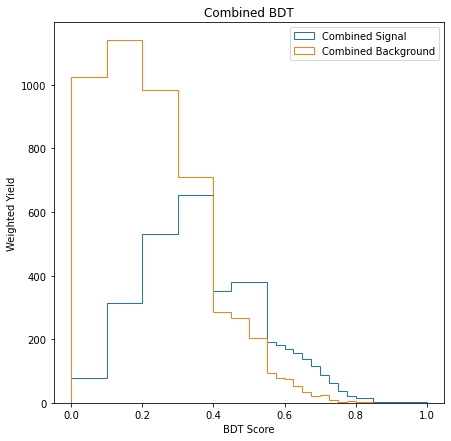

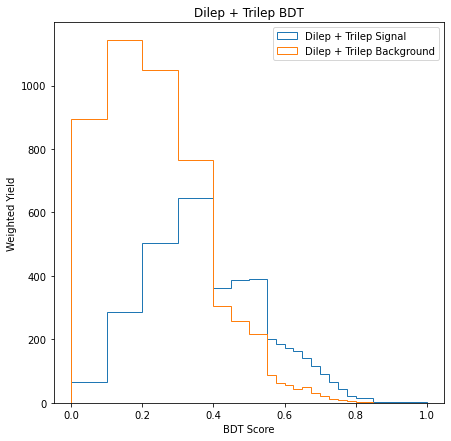

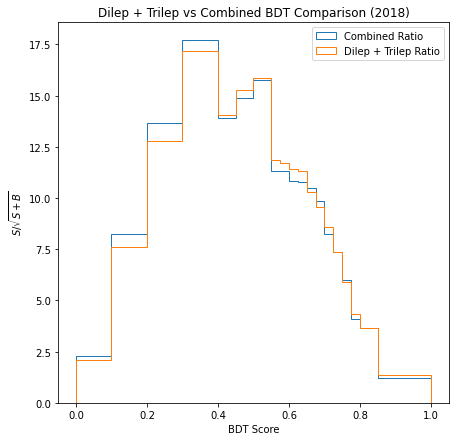

In [153]:
#compare the ratios
tmp_bins = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.45, 0.50, 0.55, 0.575, 0.60, 0.625, 0.65, 0.675, 0.70, 0.725, 0.75, 0.775, 0.8, 0.85, 1.0])
dilep_trilep_background = np.concatenate([dilep_trilep_prediction_dict[b] for b in ["fakes", "flips", "rares"]])
combined_background = np.concatenate([total_prediction_dict[b] for b in ["fakes", "flips", "rares"]])
combined_background_weight = np.concatenate([combined_dict[b].weight for b in ["fakes", "flips", "rares"]])
combined_signal_weight = combined_dict["signal"].weight
combined_signal_prediction_hist = Hist1D(total_prediction_dict["signal"], bins=tmp_bins, weights=combined_signal_weight/100)
combined_background_prediction_hist = Hist1D(combined_background, bins=tmp_bins, weights=combined_background_weight)
dilep_trilep_signal_prediction_hist = Hist1D(dilep_trilep_prediction_dict["signal"], bins=tmp_bins, weights=combined_signal_weight/100)
dilep_trilep_background_prediction_hist = Hist1D(dilep_trilep_background, bins=tmp_bins, weights=combined_background_weight)
plt.figure("sig/back combined", figsize=(7,7))
combined_signal_prediction_hist.plot(ax=plt.gca(), label="Combined Signal")
combined_background_prediction_hist.plot(ax=plt.gca(), label="Combined Background")
plt.title("Combined BDT")
plt.xlabel("BDT Score")
plt.ylabel("Weighted Yield")
plt.legend()
plt.figure("sig/back dilep_trilep", figsize=(7,7))
dilep_trilep_signal_prediction_hist.plot(ax=plt.gca(), label = "Dilep + Trilep Signal")
dilep_trilep_background_prediction_hist.plot(ax=plt.gca(), label = "Dilep + Trilep Background")
plt.title("Dilep + Trilep BDT")
plt.xlabel("BDT Score")
plt.ylabel("Weighted Yield")
plt.legend()

plt.figure("comparision", figsize=(7,7))
total_hist = combined_signal_prediction_hist + combined_background_prediction_hist
print(dir(total_hist))
print(total_hist.counts)
def get_s_b_ratio(s_hist, b_hist):
    #breakpoint()
    tot_hist = s_hist + b_hist
    #print(tot_hist.counts)
    denom_hist = Hist1D.from_bincounts(np.sqrt(np.array(tot_hist.counts)), bins=tot_hist.edges)
    #print(denom_hist.counts)
    result = s_hist.divide(denom_hist)
    #print(result.counts)
    return result

combined_ratio = get_s_b_ratio(combined_signal_prediction_hist, combined_background_prediction_hist)
dilep_trilep_ratio = get_s_b_ratio(dilep_trilep_signal_prediction_hist, dilep_trilep_background_prediction_hist)
combined_ratio.plot(ax=plt.gca(), label = "Combined Ratio")
dilep_trilep_ratio.plot(ax=plt.gca(), label = "Dilep + Trilep Ratio")
plt.title("Dilep + Trilep vs Combined BDT Comparison ({})".format(year))
plt.xlabel("BDT Score")
plt.ylabel(r'$S/\sqrt{S + B}$')
plt.legend()
plt.draw()

### Make a Datacard with BDT Binning

In [154]:
def gen_datacard(df_dict, prediction_dict, signal_name, out_dir="/home/users/cmcmahon/public_html/BDT/datacards/", y=2018):
    yield_dict = {}
    BDT_signal = df_dict["signal"]
    BDT_fakes = df_dict["fakes"]
    BDT_flips = df_dict["flips"]
    BDT_rares = df_dict["rares"]
    BDT_bins =  np.array([0.3, 0.4, 0.45, 0.50, 0.55, 0.575, 0.60, 0.625, 0.65, 0.675, 0.70,  1.0])
    feature_names = BDT_fakes.columns[1:-2]  #full_data
    fakes_weights = BDT_fakes.weight 
    flips_weights = BDT_flips.weight
    rares_weights = BDT_rares.weight 
    signal_weights = BDT_signal.weight / 100.0
    signal_predictions = prediction_dict["signal"]
    fakes_predictions = prediction_dict["fakes"]
    flips_predictions = prediction_dict["flips"]
    rares_predictions = prediction_dict["rares"]
    signal_digitized = np.digitize(signal_predictions, BDT_bins)
    flips_digitized = np.digitize(flips_predictions, BDT_bins)
    fakes_digitized = np.digitize(fakes_predictions, BDT_bins)
    rares_digitized = np.digitize(rares_predictions, BDT_bins)
    for b in range(1, len(BDT_bins)):
        background_sum = 0
        for category in ["signal", "fakes", "flips", "rares"]:
            yield_name = "bin_{0}_{1}".format(b-1, category)
            if category=="signal":
                tmp_yield = np.sum(signal_weights[signal_digitized==b])
                tmp_BDT_hist = Hist1D(signal_predictions, bins=BDT_bins, weights=signal_weights, overflow=False)
            elif category =="flips":
                tmp_yield = np.sum(flips_weights[flips_digitized==b])
                tmp_BDT_hist = Hist1D(flips_predictions, bins=BDT_bins, weights=flips_weights, overflow=False)
            elif category == "fakes":
                tmp_yield = np.sum(fakes_weights[fakes_digitized==b])
                tmp_BDT_hist = Hist1D(fakes_predictions, bins=BDT_bins, weights=fakes_weights, overflow=False)
            elif category == "rares":
                tmp_yield = np.sum(rares_weights[rares_digitized==b])
                tmp_BDT_hist = Hist1D(rares_predictions, bins=BDT_bins, weights=rares_weights, overflow=False)
            tmp_error = tmp_BDT_hist.errors[b-1]
            if tmp_yield > 0:
                yield_dict[yield_name] = tmp_yield
                yield_dict[yield_name+"_error"] = tmp_error
            elif tmp_yield <=0:
                yield_dict[yield_name] = 0.01
                yield_dict[yield_name+"_error"] = 0.0
            if category != "signal":
                background_sum += tmp_yield
        yield_dict["bin_{0}_Total_Background".format(b-1)] = background_sum
    output_path = out_dir + signal_name + "/"
    os.makedirs(output_path, exist_ok=True)
    postProcessing.makeCards.make_BDT_datacard(yield_dict, BDT_bins, s, y, output_path)

HCT_dict = combined_dict.copy()
HUT_dict = combined_dict.copy()
HCT_dict["signal"] = pd.concat([BDT_analysis.load_category("signal_tch", dilep_baby_dir), BDT_analysis.load_category("signal_tch", trilep_baby_dir)], axis=0)
HUT_dict["signal"] = pd.concat([BDT_analysis.load_category("signal_tuh", dilep_baby_dir), BDT_analysis.load_category("signal_tuh", trilep_baby_dir)], axis=0)

HCT_dilep_trilep_prediction_dict = dilep_trilep_prediction_dict.copy()
HUT_dilep_trilep_prediction_dict = dilep_trilep_prediction_dict.copy()
HCT_dilep_signal_prediction = dilep_booster.predict(make_dmatrix(BDT_analysis.load_category("signal_tch", dilep_baby_dir)))
HCT_trilep_signal_prediction = dilep_booster.predict(make_dmatrix(BDT_analysis.load_category("signal_tch", trilep_baby_dir)))
HUT_dilep_signal_prediction = dilep_booster.predict(make_dmatrix(BDT_analysis.load_category("signal_tuh", dilep_baby_dir)))
HUT_trilep_signal_prediction = dilep_booster.predict(make_dmatrix(BDT_analysis.load_category("signal_tuh", trilep_baby_dir)))
HCT_dilep_trilep_prediction_dict["signal"] = np.concatenate([HCT_dilep_signal_prediction, HCT_trilep_signal_prediction])
HUT_dilep_trilep_prediction_dict["signal"] = np.concatenate([HUT_dilep_signal_prediction, HUT_trilep_signal_prediction])

HCT_combined_prediction_dict = total_prediction_dict.copy()
HUT_combined_prediction_dict = total_prediction_dict.copy()
HCT_combined_prediction_dict["signal"] = booster.predict(make_dmatrix(HCT_dict["signal"]))
HUT_combined_prediction_dict["signal"] = booster.predict(make_dmatrix(HUT_dict["signal"]))

combined_predictions = {
    "HCT":HCT_combined_prediction_dict,
    "HUT":HUT_combined_prediction_dict
}
dilep_trilep_predictions = {
    "HCT":HCT_dilep_trilep_prediction_dict,
    "HUT":HUT_dilep_trilep_prediction_dict
}
combined_dict_split_signal = {
    "HCT":HCT_dict,
    "HUT":HUT_dict
}
for s in ["HCT", "HUT"]:
    gen_datacard(combined_dict_split_signal[s], dilep_trilep_predictions[s], s, out_dir="/home/users/cmcmahon/public_html/BDT/datacards/Dilep_Trilep/", y=year)
    gen_datacard(combined_dict_split_signal[s], combined_predictions[s], s, out_dir="/home/users/cmcmahon/public_html/BDT/datacards/Combined/", y=year)

got yields and stat errors
defined output dataframe
filled stat uncertainties
filled syst uncertainties
got yields and stat errors
defined output dataframe
filled stat uncertainties
filled syst uncertainties
got yields and stat errors
defined output dataframe
filled stat uncertainties
filled syst uncertainties
got yields and stat errors
defined output dataframe
filled stat uncertainties
filled syst uncertainties


In [13]:
#look at the different background categories (fakes, flips and rares)
if flag_load_babies:
    tot_BDT_signal = pd.concat([dict_SR["HCT"]["signal"], dict_SR["HUT"]["signal"]], axis=0)
    tot_BDT_flips = dict_SR["HCT"]["flips"]
    tot_BDT_fakes = dict_SR["HCT"]["fakes"]
    tot_BDT_rares = dict_SR["HCT"]["rares"]
    feature_names = tot_BDT_fakes.columns[1:-2] # we skip the first and last two columns because they are the ID, weight, and label    
else:
    tot_BDT_signal, tot_BDT_fakes = get_SR_BR(signal_name, base_dir, version, year, BDT_params, background_category="fakes", flag_match_yields=False)[:2]
    tot_BDT_flips = get_SR_BR(signal_name, base_dir, version, year, BDT_params, background_category="flips", flag_match_yields=False, gen_signal=False)[1]
    tot_BDT_rares = get_SR_BR(signal_name, base_dir, version, year, BDT_params, background_category="rares", flag_match_yields=False, gen_signal=False)[1]
    feature_names = tot_BDT_fakes.columns[1:-2] # we skip the first and last two columns because they are the ID, weight, and label

### Export BDT to a Customized XML File
This puts the BDT into a format that can be processed by the TMVA library in ROOT. See [here](https://github.com/cjmcmahon1/FCNCAnalysis/blob/main/analysis/helpers/BDT/booster.h) for how to turn this into a TMVA booster.

In [69]:
import re
import xml.etree.cElementTree as ET
regex_float_pattern = r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'

def build_tree(xgtree, base_xml_element, var_indices):
    parent_element_dict = {'0':base_xml_element}
    pos_dict = {'0':'s'}
    for line in xgtree.split('\n'):
        if not line: continue
        if ':leaf=' in line:
            #leaf node
            result = re.match(r'(\t*)(\d+):leaf=({0})$'.format(regex_float_pattern), line)
            if not result:
                print(line)
            depth = result.group(1).count('\t')
            inode = result.group(2)
            res = result.group(3)
            node_elementTree = ET.SubElement(parent_element_dict[inode], "Node", pos=str(pos_dict[inode]),
                                             depth=str(depth), NCoef="0", IVar="-1", Cut="0.0e+00", cType="1", res=str(res), rms="0.0e+00", purity="0.0e+00", nType="-99")
        else:
            #\t\t3:[var_topcand_mass<138.19] yes=7,no=8,missing=7
            result = re.match(r'(\t*)([0-9]+):\[(?P<var>.+)<(?P<cut>{0})\]\syes=(?P<yes>\d+),no=(?P<no>\d+)'.format(regex_float_pattern),line)
            if not result:
                print(line)
            depth = result.group(1).count('\t')
            inode = result.group(2)
            var = result.group('var')
            cut = result.group('cut')
            lnode = result.group('yes')
            rnode = result.group('no')
            pos_dict[lnode] = 'l'
            pos_dict[rnode] = 'r'
            node_elementTree = ET.SubElement(parent_element_dict[inode], "Node", pos=str(pos_dict[inode]),
                                             depth=str(depth), NCoef="0", IVar=str(var_indices[var]), Cut=str(cut),
                                             cType="1", res="0.0e+00", rms="0.0e+00", purity="0.0e+00", nType="0")
            parent_element_dict[lnode] = node_elementTree
            parent_element_dict[rnode] = node_elementTree
            
def convert_model(model, input_variables, output_xml):
    NTrees = len(model)
    var_list = input_variables
    var_indices = {}
    
    # <MethodSetup>
    MethodSetup = ET.Element("MethodSetup", Method="BDT::BDT")

    # <Variables>
    Variables = ET.SubElement(MethodSetup, "Variables", NVar=str(len(var_list)))
    for ind, val in enumerate(var_list):
        name = val[0]
        var_type = val[1]
        var_indices[name] = ind
        Variable = ET.SubElement(Variables, "Variable", VarIndex=str(ind), Type=val[1], 
            Expression=name, Label=name, Title=name, Unit="", Internal=name, 
            Min="0.0e+00", Max="0.0e+00")

    # <GeneralInfo>
    GeneralInfo = ET.SubElement(MethodSetup, "GeneralInfo")
    Info_Creator = ET.SubElement(GeneralInfo, "Info", name="Creator", value="xgboost2TMVA")
    Info_AnalysisType = ET.SubElement(GeneralInfo, "Info", name="AnalysisType", value="Classification")

    # <Options>
    Options = ET.SubElement(MethodSetup, "Options")
    Option_NodePurityLimit = ET.SubElement(Options, "Option", name="NodePurityLimit", modified="No").text = "5.00e-01"
    Option_BoostType = ET.SubElement(Options, "Option", name="BoostType", modified="Yes").text = "Grad"
    
    # <Weights>
    Weights = ET.SubElement(MethodSetup, "Weights", NTrees=str(NTrees), AnalysisType="1")
    
    for itree in range(NTrees):
        BinaryTree = ET.SubElement(Weights, "BinaryTree", type="DecisionTree", boostWeight="1.0e+00", itree=str(itree))
        build_tree(model[itree], BinaryTree, var_indices)
        
    tree = ET.ElementTree(MethodSetup)
    tree.write(output_xml)
    # format it with 'xmllint --format'
#print(feature_names)
input_variables = []
for var in range(len(feature_names)):
    input_variables.append([feature_names[var]])
    input_variables[var].append("F")
#print(input_variables)
#convert_model(booster.get_dump(), input_variables = input_variables, output_xml = "./test.xml")
convert_model(booster.get_dump(), input_variables = input_variables, output_xml = "/home/users/cmcmahon/fcnc/ana/analysis/helpers/BDT/BDT.xml")

### Old Stuff

Text(0.5, 1.0, 'Correlation Matrix')

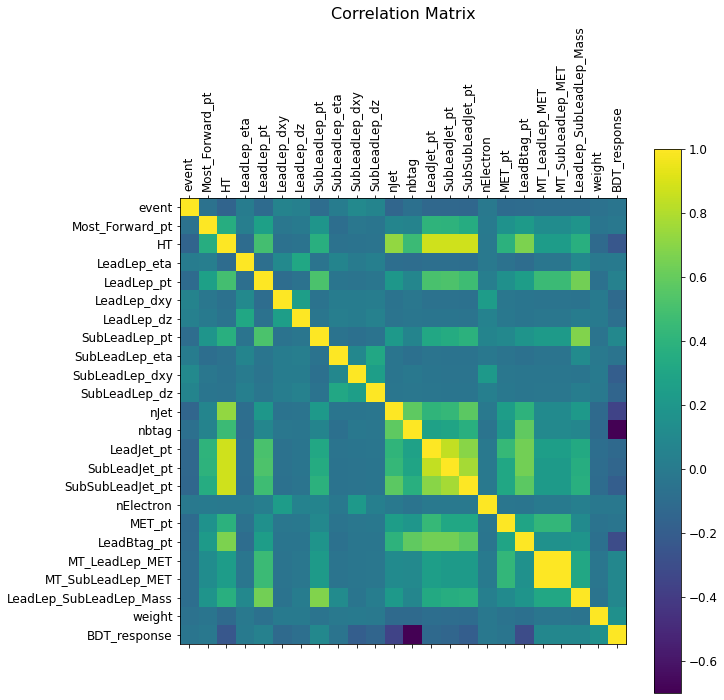

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

im = ax.matshow(corr_df.corr())
ax.set_xticks(range(corr_df.select_dtypes(['number']).shape[1]))
ax.set_xticklabels(corr_df.select_dtypes(['number']).columns, rotation=90, fontdict={'fontsize':12})
ax.set_yticks(range(corr_df.select_dtypes(['number']).shape[1]))
ax.set_yticklabels(corr_df.select_dtypes(['number']).columns, fontdict={'fontsize':12})
cbar = ax.figure.colorbar(im)
cbar.ax.tick_params(labelsize=12)

ax.set_title('Correlation Matrix', fontsize=16)

### Old Methods for BDT Parameter Optimization

In [221]:
#play around with lots of paramters
boosters = []
num_trees_list = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
lr_list = [n/0.017 for n in [1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3]]
depth_list = [2, 3, 4, 5, 6]
optimization_param = {}

# Booster parameters
param['eta']              = 3e-3 / 0.017 # learning rate
param['max_depth']        = 3  # maximum depth of a tree
param['subsample']        = 0.7 # fraction of events to train tree on
param['colsample_bytree'] = 0.7 # fraction of features to train tree on

# Learning task parameters
param['objective']   = 'binary:logistic' # objective function
param['eval_metric'] = 'error'           # evaluation metric for cross validation
param = list(param.items()) + [('eval_metric', 'logloss')] + [('eval_metric', 'rmse')]

num_trees = num_trees_list[n] # number of trees to make


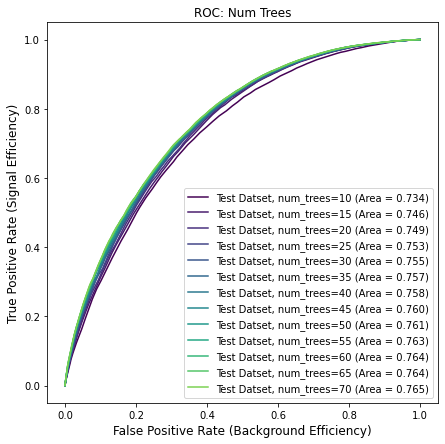

In [223]:
def gen_TPR_FPR(booster, color1, color2, label, ax, plot_train=True, plot_test=True):
    test_predictions = booster.predict(test)
    train_predictions = booster.predict(train)
    cuts = np.linspace(0,1,200);
    # TPR = TP / (TP + FN)
    # FPR = FP / (FP + TN)
    train_TP = np.zeros(len(cuts))
    train_FP = np.zeros(len(cuts))
    train_TN = np.zeros(len(cuts))
    train_FN = np.zeros(len(cuts))
    test_TP = np.zeros(len(cuts))
    test_FP = np.zeros(len(cuts))
    test_TN = np.zeros(len(cuts))
    test_FN = np.zeros(len(cuts))

    for i,cut in enumerate(cuts):
        train_pos = (train_predictions >  cut)
        train_neg = (train_predictions <= cut)
        train_TP[i] = np.sum(train.get_weight()[(data_train.Label=='s') & train_pos])
        train_FP[i] = np.sum(train.get_weight()[(data_train.Label=='b') & train_pos])
        train_TN[i] = np.sum(train.get_weight()[(data_train.Label=='b') & train_neg])
        train_FN[i] = np.sum(train.get_weight()[(data_train.Label=='s') & train_neg])

        test_pos = (test_predictions >  cut)
        test_neg = (test_predictions <= cut)
        test_TP[i] = np.sum(test.get_weight()[(data_test.Label=='s') & test_pos])
        test_FP[i] = np.sum(test.get_weight()[(data_test.Label=='b') & test_pos])
        test_TN[i] = np.sum(test.get_weight()[(data_test.Label=='b') & test_neg])
        test_FN[i] = np.sum(test.get_weight()[(data_test.Label=='s') & test_neg])
    

    # plot efficiency vs. purity (ROC curve)
    train_TPR = train_TP / (train_TP + train_FN)
    train_FPR = train_FP / (train_FP + train_TN)
    train_AUC = auc(train_FPR, train_TPR)
    
    test_TPR = test_TP / (test_TP + test_FN)
    test_FPR = test_FP / (test_FP + test_TN)
    test_AUC = auc(test_FPR, test_TPR)
    AUC_difference = np.abs(train_AUC - test_AUC)
    if AUC_difference < 0.02:
        ax.plot(test_FPR, test_TPR, '-', color=color1, label="Test Datset, {0}(Area = {1:.3f})".format(label, test_AUC))
        #ax.plot(train_FPR, train_TPR, '--', color=color2, label="Train Datset, {0}(Area = {1:.3f})".format(label, train_AUC))
    
plt.figure(figsize=(7,7));
num_param = len(num_trees_list)
for i in range(0, num_param-2):
    label = "num_trees={0} ".format(num_trees_list[i])
    gen_TPR_FPR(booster=boosters[i], color1=cm.viridis(i * 256//15), color2="red", label=label, ax=plt.gca())
    plt.xlabel('False Positive Rate (Background Efficiency)',fontsize=12);
    plt.ylabel('True Positive Rate (Signal Efficiency)',fontsize=12);

plt.legend()
plt.title("ROC: Num Trees")
plt.draw()

There is not a lot of discriminating power in that variable. For fun, we can plot it with the next most important feature:

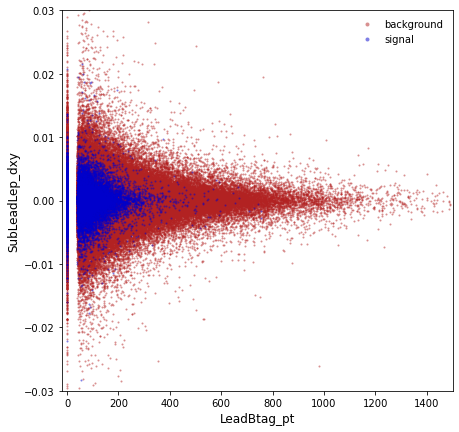

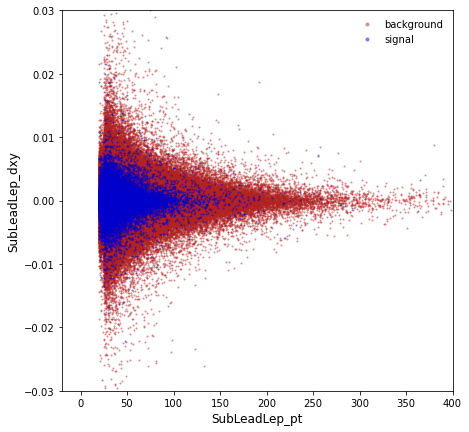

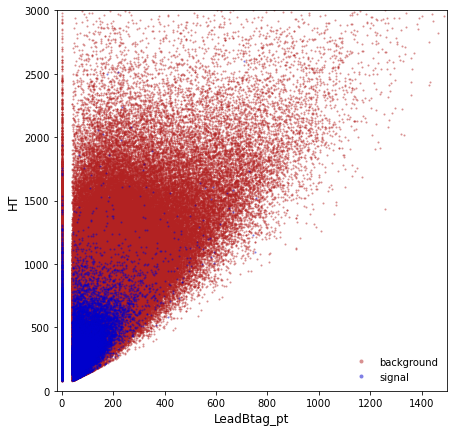

In [70]:
plt.figure("leadbtag_dxy", figsize=(7,7));
plt.plot(data_train.LeadBtag_pt[data_train.Label == 'b'],data_train.SubLeadLep_dxy[data_train.Label == 'b'],
         'o',markersize=2,color='firebrick',markeredgewidth=0,alpha=0.5,label='background');
plt.plot(data_train.LeadBtag_pt[data_train.Label == 's'],data_train.SubLeadLep_dxy[data_train.Label == 's'],
         'o',markersize=2,color='mediumblue',markeredgewidth=0,alpha=0.5,label='signal');
plt.xlabel('LeadBtag_pt',fontsize=12);
plt.ylabel('SubLeadLep_dxy',fontsize=12);
plt.xlim([-20, 1500])
plt.ylim([-0.03, 0.03])
plt.legend(frameon=False,numpoints=1,markerscale=2);

plt.figure("dxy_pt", figsize=(7,7));
plt.plot(data_train.SubLeadLep_pt[data_train.Label == 'b'],data_train.SubLeadLep_dxy[data_train.Label == 'b'],
         'o',markersize=2,color='firebrick',markeredgewidth=0,alpha=0.5,label='background');
plt.plot(data_train.SubLeadLep_pt[data_train.Label == 's'],data_train.SubLeadLep_dxy[data_train.Label == 's'],
         'o',markersize=2,color='mediumblue',markeredgewidth=0,alpha=0.5,label='signal');
plt.xlabel('SubLeadLep_pt',fontsize=12);
plt.ylabel('SubLeadLep_dxy',fontsize=12);
plt.xlim([-20, 400])
plt.ylim([-0.03, 0.03])
plt.legend(frameon=False,numpoints=1,markerscale=2);

plt.figure("leadbtag_ht", figsize=(7,7));
plt.plot(data_train.LeadBtag_pt[data_train.Label == 'b'],data_train.HT[data_train.Label == 'b'],
         'o',markersize=2,color='firebrick',markeredgewidth=0,alpha=0.5,label='background');
plt.plot(data_train.LeadBtag_pt[data_train.Label == 's'],data_train.HT[data_train.Label == 's'],
         'o',markersize=2,color='mediumblue',markeredgewidth=0,alpha=0.5,label='signal');
plt.xlabel('LeadBtag_pt',fontsize=12);
plt.ylabel('HT',fontsize=12);
plt.xlim([-20, 1500])
plt.ylim([0, 3000])
plt.legend(frameon=False,numpoints=1,markerscale=2);